# Introduction


**What?** GMM = Gaussian Mixture Model for Generating New Data



# Import modules

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn import mixture

# Import dataset

In [23]:
digits = load_digits()
digits.data.shape

(1797, 64)

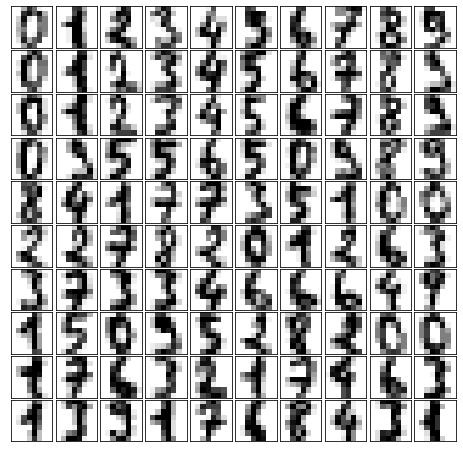

In [24]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
    subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary') 
        im.set_clim(0, 16)
plot_digits(digits.data)

# Build a PCA model


- **Goal?** We will generate new handwritten digits from the standard digits corpus that we have used before.
- We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more. 
- GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data. 
- We'll ask the PCA model to preserve the 99% of the variance.
- The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss.  



In [6]:
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

# How many components?


- Given this projected data, let’s use the AIC to get a gauge for the number of GMM components we should use 
- It appears that around **110 components** minimizes the AIC; we will use this model. 



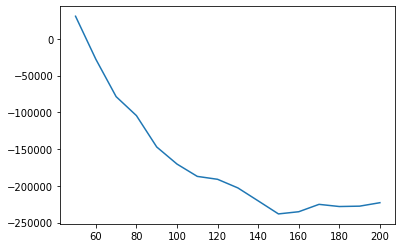

In [8]:
n_components = np.arange(50, 210, 10)

models = [mixture.GaussianMixture(n, covariance_type='full', random_state=0) for n in n_components]

aics = [model.fit(data).aic(data) for model in models] 
plt.plot(n_components, aics);

In [26]:
gmm = mixture.GaussianMixture(110, covariance_type = 'full', random_state=0)
gmm.fit(data)
print("Has GMM converged? ", gmm.converged_)

Has GMM converged?  True


# Generating new samples


- Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model



In [30]:
data_new = gmm.sample(100)
print(data_new[:][0])

[[ 2.05530964  0.30015748 -0.73730827 ...  0.03781064 -0.36428857
  -0.9587975 ]
 [-0.81301807 -0.76991109  2.6532548  ...  0.45030888 -0.28455512
  -0.69526092]
 [-0.54403566 -0.21644947  2.02040491 ...  0.22464487  0.83075971
   0.25280513]
 ...
 [ 0.09652344 -1.18504535 -1.70232314 ... -0.38272837 -0.60465867
  -0.18248399]
 [ 1.48475333  1.48492787  1.12574738 ...  1.37805797  1.38194656
   0.02973891]
 [ 1.45175559  1.20475297  1.56436845 ...  0.21149018  0.18059945
   1.48323387]]


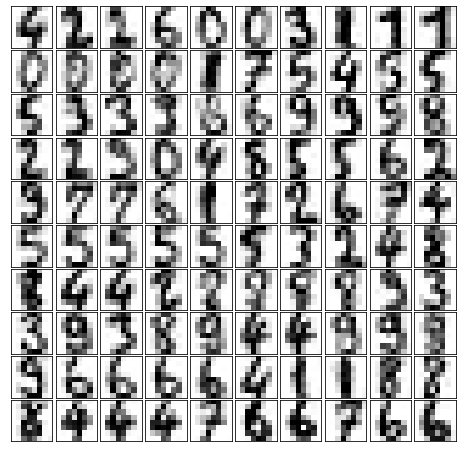

In [22]:
digits_new = pca.inverse_transform(data_new[:][0])
plot_digits(digits_new)

# References


- VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
- https://github.com/jakevdp/PythonDataScienceHandbook
    


# Conclusions


- Given a sampling of handwritten digits, we have modeled the distribution of that data in such a way that **we can generate** brand new samples of digits from the data.
- These are “handwritten digits” that do not individually appear in the original dataset, but rather capture the general features of the input data as modeled by the mixture model.

